# New issue with black particles

In some new images (with better image quality), `find_black` function does not work as good. Below is an example.

In [4]:
from skimage import io
import matplotlib.pyplot as plt

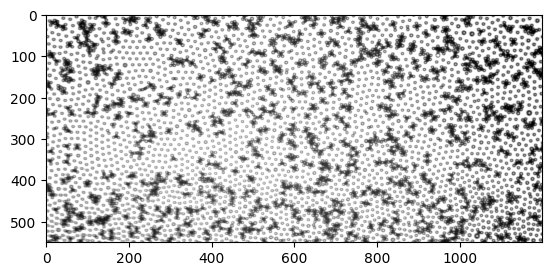

In [5]:
img = io.imread(r"..\..\test_images\2023-01-29_black.tif")
plt.imshow(img, cmap="gray")

## 1 Old method (bwtrack v1.3)

Note that the functions here are from old versions of bwtrack. You may not get the same results if you have already updated bwtrack.

### 1.1 Use default parameters

`find_black` only requires 1 argument -- the input image, and it accepts optional argument, e.g. size, thres and std_thres to filter out false positives. See the documentation of the function below.

In [ ]:
help(find_black)

Help on function find_black in module bwtrack.bwtrack:

find_black(img, size=7, thres=None, std_thres=None, plot_hist=False)
    Find black particles in 乔哥's image. 
    
    :param img: raw image to find particles in 
    :type img: 2d array
    :param size: diameter of particle (px)
    :type size: int
    :param thres: threshold of mean intensity for discerning black and white particles. If None, the function will plot a histogram of mean intensity to help us.
    :type thres: int
    :param std_thres: threshold of standard deviation for discerning black and white particles. If None, the function will plot a histogram of standard deviation to help us.
    
    .. note::
    
       If ``thres=None`` or ``std_thres=None``, all detected features will be returned. Histograms of mean intensity and standard deviation will be plotted to help us set the threshold.
    
    :return: list of particle positions, pixel value sums and corr map peak values (x, y, pv, peak)
    :rtype: pandas.Dat

We first use the default parameter set, i.e. size=7, thres=None, std_thres=None.

In [6]:
from bwtrack.bwtrack import find_black, find_white, show_result

In [14]:
black = find_black(img)

Threshold value(s) are missing, all detected features are returned.


C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: divide by zero encountered in divide
  out = out / np.sqrt(image * template)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

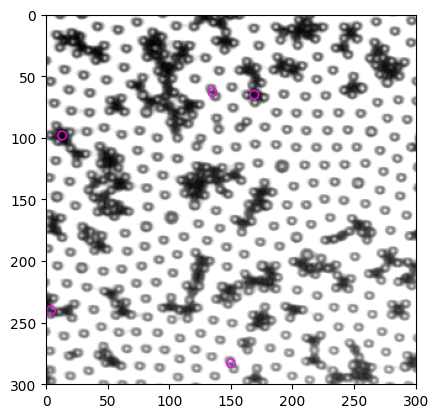

In [18]:
show_result(img, black, size=7, ROI=[0, 300, 300, 0])

Only very few black particles are detected. 

### 1.2 Try to vary optional arguments

`size=6`.

C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: divide by zero encountered in divide
  out = out / np.sqrt(image * template)
C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: invalid value encountered in divide
  out = out / np.sqrt(image * template)


Threshold value(s) are missing, all detected features are returned.


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

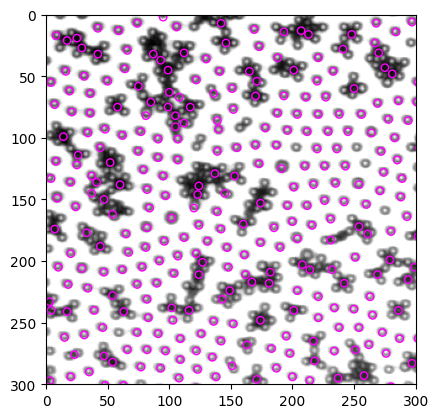

In [19]:
black = find_black(img, size=6)
show_result(img, black, size=6, ROI=[0, 300, 300, 0])

Many more black particles are detected, but meanwhile many white particles are recognized as black. We can look at the histograms and set threshold to distinguish true black particles from false positives.

C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: divide by zero encountered in divide
  out = out / np.sqrt(image * template)
C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: invalid value encountered in divide
  out = out / np.sqrt(image * template)


Threshold value(s) are missing, all detected features are returned.


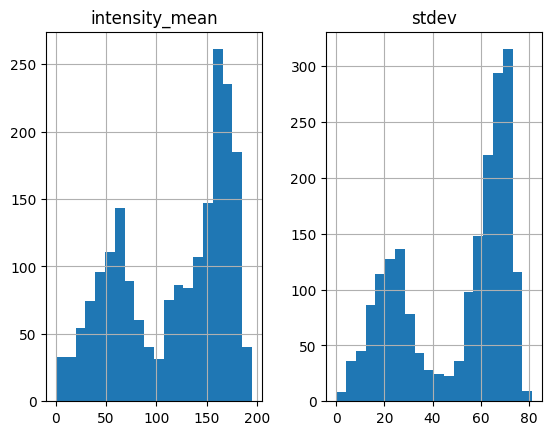

In [22]:
black = find_black(img, size=6, plot_hist=True)

Try to set intensity threshold at 100.

C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: divide by zero encountered in divide
  out = out / np.sqrt(image * template)
C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: invalid value encountered in divide
  out = out / np.sqrt(image * template)


Standard deviation threshold is not set, only apply mean intensity threshold


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

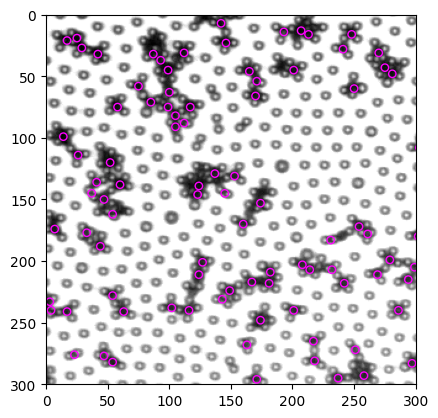

In [25]:
black = find_black(img, size=6, thres=100)
show_result(img, black, size=6, ROI=[0, 300, 300, 0])

The result is good.

## 2 Try `find_white`

Although there are less problems with `find_white`, according to Qiaoge, I test the goodness of white tracking on these new images. 

C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: divide by zero encountered in divide
  out = out / np.sqrt(image * template)
C:\Users\liuzy\Documents\Github\mylib\src\myimagelib\xcorr_funcs.py:42: RuntimeWarning: invalid value encountered in divide
  out = out / np.sqrt(image * template)


Threshold value(s) are missing, all detected features are returned.


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

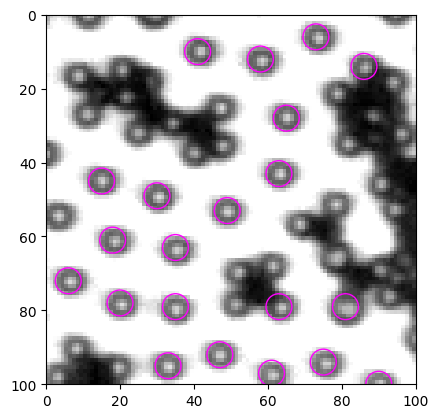

In [31]:
white = find_white(img, size=7)
show_result(img, white, size=7)

Again, isolated particles can be found with good accuracy, but white particles in clusters are harder to find. There are two issues:

- look smaller than isolated particles
- intensity profile is not symmetric, which is different from the template